Question: When viewing state-specific data, is there a significant difference between the these ratios:
Ratio 1) number of individuals that have attained a B.A. or higher : number of individuals that have received a COVID vaccination.
Ratio 2) number of individuals that have graduated from high school : number of individuals that have received either a COVID vaccination.

I will compare ratios the means for each ratio, using a two sample z-test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
"""First dataframe: 'State-by-state data on COVID-19 vaccinations in the United States' """

covid_vax_data = pd.read_csv('C:/Users/Student/Desktop/covid_vax_data.csv')
#source: https://ourworldindata.org/us-states-vaccinations

covid_vax_data #sanity check

,Entity,Code,Day,daily_vaccinations
0,Alabama,NaN,1/13/2021,5906
1,Alabama,NaN,1/14/2021,7083
2,Alabama,NaN,1/15/2021,7478
3,Alabama,NaN,1/16/2021,7498
4,Alabama,NaN,1/17/2021,7509
...,...,...,...,...
8273,Wyoming,NaN,5/15/2021,1272
8274,Wyoming,NaN,5/16/2021,1261
8275,Wyoming,NaN,5/17/2021,1269
8276,Wyoming,NaN,5/18/2021,1105


In [3]:
covid_vax_data = covid_vax_data[['Entity', 'daily_vaccinations']]
"""Cleaning data: I eliminated the 'Code' column as it has no relevant data."""

covid_vax_data.head() #sanity check

,Entity,daily_vaccinations
0,Alabama,5906
1,Alabama,7083
2,Alabama,7478
3,Alabama,7498
4,Alabama,7509


In [4]:
covid_vax_data.columns = ['State', 'Vaccination Totals']

covid_vax_data = covid_vax_data.groupby(['State']).sum()
"""cleaning/organizing data: It will be too cumbersome later on to look at 8278 rows. I really just want to look at
comparative totals over the same time period, so I am summing daily_vaccinations by state."""

covid_vax_data.head() #sanity check

,Vaccination Totals
State,
Alabama,2822213
Alaska,560476
American Samoa,39830
Arizona,5492395
Arkansas,2019692


In [5]:
"""Second dataframe: Education level per capita by state. """

college_degrees = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment')
#source: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment

college_degrees = college_degrees[1]
college_degrees.head() #sanity check

State or Territory Population over the age of 25  \
  State or Territory Population over the age of 25   
0            Alabama                       3360058   
1             Alaska                        484058   
2            Arizona                       4944540   
3           Arkansas                       2036456   
4         California                      26937872   

  With a High School Diploma or higher          \
                            Population     Pct   
0                              2926985  87.11%   
1                               452968  93.58%   
2                              4331542  87.60%   
3                              1781463  87.48%   
4                             22636359  84.03%   

  With a Bachelor's Degree or higher         With an Advanced Degree          
                          Population     Pct              Population     Pct  
0                             885357  26.35%                  337382  10.04%  
1                             146157  30.19%                   56574  11.69%  
2                            1492158  30.18%                  561120  11.35%  
3                             475367  23.34%                  168182   8.26%  
4                            9428484  35.00%                 3538760  13.14%

In [6]:
college_degrees = pd.DataFrame(college_degrees.to_records())
#condenses multiindexing of header

college_degrees.columns.values[1] = "State" 
#Renaming to allow for later merge
college_degrees.columns.values[4] = "Pop with a HS degree or higher (%)"
college_degrees.columns.values[6] = "Pop with a BA or higher (%)"
#Renaming to make it shorter and easier to view.

college_degrees = college_degrees[['State', 'Pop with a HS degree or higher (%)', 'Pop with a BA or higher (%)']]
#Eliminating double indexing

college_degrees.head() #sanity check

,State,Pop with a HS degree or higher (%),Pop with a BA or higher (%)
0,Alabama,87.11%,26.35%
1,Alaska,93.58%,30.19%
2,Arizona,87.60%,30.18%
3,Arkansas,87.48%,23.34%
4,California,84.03%,35.00%


In [7]:
"""Third Dataframe: 2019 State Populations"""

pop = pd.read_csv('C:/Users/student/Desktop/pop_data.csv')
#source: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_1873399417

pop.head() #sanity check

,Geographic Area,1-Apr-10,Unnamed: 2,Population Estimate (as of July 1),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,United States,"308,745,538","308,758,105","309,321,666","311,556,874","313,830,990","315,993,715","318,301,008","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
2,Northeast,"55,317,240","55,318,443","55,380,134","55,604,223","55,775,216","55,901,806","56,006,011","56,034,684","56,042,330","56,059,240","56,046,620","55,982,803"
3,Midwest,"66,927,001","66,929,725","66,974,416","67,157,800","67,336,743","67,560,379","67,745,167","67,860,583","67,987,540","68,126,781","68,236,628","68,329,004"
4,South,"114,555,744","114,563,030","114,866,680","116,006,522","117,241,208","118,364,400","119,624,037","120,997,341","122,351,760","123,542,189","124,569,433","125,580,448"


In [8]:
pop = pop[['Geographic Area', 'Unnamed: 12']]
pop.columns = ['State', '2019 Population']
pop = pop.dropna() #cleaning data: dropping null values.

areas_2 = ['Northeast', 'Midwest', 'South', 'West', 'Puerto Rico']
pop = pop[~pop.State.isin(areas_2)]
"""cleaning data: removing Regions and territories to allow for easier merging. Once again, I could have allowed inner join
to accomplish this task, but felt it was easier to do in advance due to the number of dataframes to be merged and the 
non-overlapping discrepancies between dataframes."""

pop['State'] = pop['State'].str[1:] #cleaning data: There was an anomolous "." before the name of each state.
pop.head() #sanity check

,State,2019 Population
1,nited States,"328,239,523"
6,Alabama,"4,903,185"
7,Alaska,"731,545"
8,Arizona,"7,278,717"
9,Arkansas,"3,017,804"


In [9]:
first_join = pd.merge(covid_vax_data, pop, how='inner', on=['State'])
first_join.columns = ['State', 'Vaccination Totals', '2019 Population']
first_join.head()

,State,Vaccination Totals,2019 Population
0,Alabama,2822213,"4,903,185"
1,Alaska,560476,"731,545"
2,Arizona,5492395,"7,278,717"
3,Arkansas,2019692,"3,017,804"
4,California,34410923,"39,512,223"


In [10]:
full_join = pd.merge(first_join, college_degrees, how='inner', on=['State'])

full_join.head() #sanity check

,State,Vaccination Totals,2019 Population,Pop with a HS degree or higher (%),Pop with a BA or higher (%)
0,Alabama,2822213,"4,903,185",87.11%,26.35%
1,Alaska,560476,"731,545",93.58%,30.19%
2,Arizona,5492395,"7,278,717",87.60%,30.18%
3,Arkansas,2019692,"3,017,804",87.48%,23.34%
4,California,34410923,"39,512,223",84.03%,35.00%


In [11]:
full_join['2019 Population'] = full_join['2019 Population'].str.replace(',', '').astype(float) 
#cleaning data: changing string to float and removing ','

full_join['Pop with a HS degree or higher (%)'] = full_join['Pop with a HS degree or higher (%)'].str[:-1]
full_join['Pop with a HS degree or higher (%)'] = full_join['Pop with a HS degree or higher (%)'].str.replace(',', '').astype(float)
#cleaning data: changing string to float and removing '%'

full_join['Pop with a BA or higher (%)'] = full_join['Pop with a BA or higher (%)'].str[:-1]
full_join['Pop with a BA or higher (%)'] = full_join['Pop with a BA or higher (%)'].str.replace(',', '').astype(float)
#cleaning data: changing string to float and removing '%'

full_join['Pop Vaccinated (%)'] = full_join['Vaccination Totals']/full_join['2019 Population']*100
#calculating percentage of population vaccinated
full_join['Pop Vaccinated (%)'] = full_join['Pop Vaccinated (%)'].round(decimals=2)
#cleaning data: limiting to two decimal places

full_join['Vax/HS (%)'] = full_join['Pop Vaccinated (%)']/full_join['Pop with a HS degree or higher (%)']*100
#calculating percentage of population vaccinated
full_join['Vax/HS (%)'] = full_join['Vax/HS (%)'].round(decimals=2)
#cleaning data: limiting to two decimal places

full_join['Vax/BA (%)'] = full_join['Pop Vaccinated (%)']/full_join['Pop with a BA or higher (%)']*100
#calculating percentage of population vaccinated
full_join['Vax/BA (%)'] = full_join['Vax/BA (%)'].round(decimals=2)
#cleaning data: limiting to two decimal places

full_join.head() #sanity check

,State,Vaccination Totals,2019 Population,Pop with a HS degree or higher (%),Pop with a BA or higher (%),Pop Vaccinated (%),Vax/HS (%),Vax/BA (%)
0,Alabama,2822213,4903185.0,87.11,26.35,57.56,66.08,218.44
1,Alaska,560476,731545.0,93.58,30.19,76.62,81.88,253.79
2,Arizona,5492395,7278717.0,87.60,30.18,75.46,86.14,250.03
3,Arkansas,2019692,3017804.0,87.48,23.34,66.93,76.51,286.76
4,California,34410923,39512223.0,84.03,35.00,87.09,103.64,248.83


In [12]:
full_join[['Vaccination Totals']].describe()
# I'm nooticing a large standard deviation.

,Vaccination Totals
count,5.000000e+01
mean,5.014501e+06
std,5.873803e+06
min,3.671710e+05
25%,1.460702e+06
50%,3.426454e+06
75%,6.643163e+06
max,3.441092e+07


In [13]:
full_join[['Pop Vaccinated (%)']].describe()
#I'm noticing a large spread between min and max.

,Pop Vaccinated (%)
count,50.00000
mean,79.35420
std,12.20991
min,55.89000
25%,69.85250
50%,79.06000
75%,87.20250
max,105.29000


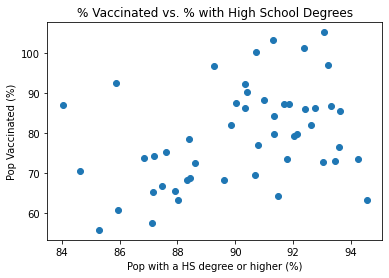

In [14]:
plt.scatter(full_join['Pop with a HS degree or higher (%)'], full_join['Pop Vaccinated (%)'])
plt.title('% Vaccinated vs. % with High School Degrees')
plt.xlabel('Pop with a HS degree or higher (%)')
plt.ylabel('Pop Vaccinated (%)')
plt.show()

#This plot is too disorganized to visually assess for a pattern or correlation.

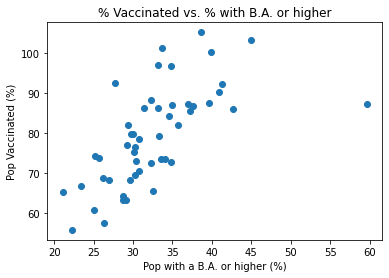

In [15]:
plt.scatter(full_join['Pop with a BA or higher (%)'], full_join['Pop Vaccinated (%)'])
plt.title('% Vaccinated vs. % with B.A. or higher')
plt.xlabel('Pop with a B.A. or higher (%)')
plt.ylabel('Pop Vaccinated (%)')
plt.show()

#While this plot is somewhat clearer and may indicate correlation between the tow variables, I still feel that the z-test
#will give the best info.

Text(0.5, 1.0, 'Distibution of Percentages of Vaccinated Populations per State')

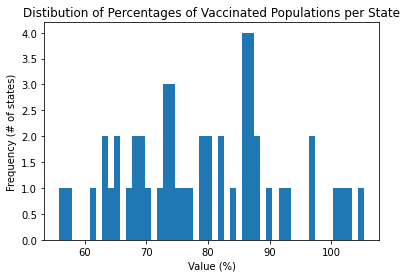

In [18]:
Vax_Pop = full_join[['State', 'Pop Vaccinated (%)']]


plt.hist((Vax_Pop['Pop Vaccinated (%)']), bins = 50)
plt.xlabel('Value (%)')
plt.ylabel('Frequency (# of states)')
plt.title("Distibution of Percentages of Vaccinated Populations per State")
#I am plotting histogram of vaccination percentages to look at the shape of the distribution.

Observations: The histogram above is obviously does not show a normal distribution, but I will still use a z-test since the sample size is greater than 30.

In [19]:
Vax_HS = full_join[['State', 'Vax/HS (%)']]
Vax_HS = Vax_HS.sort_values(by=['Vax/HS (%)'], ascending=True)
Vax_HS.describe()

,Vax/HS (%)
count,50.000000
mean,87.922600
std,12.840109
min,65.520000
25%,78.030000
50%,86.490000
75%,95.505000
max,113.130000


In [21]:
Vax_BA = full_join[['State', 'Vax/BA (%)']]
Vax_BA = Vax_BA.sort_values(by=['Vax/BA (%)'], ascending=True)
Vax_BA.describe()

,Vax/BA (%)
count,50.000000
mean,247.151400
std,32.945174
min,146.200000
25%,224.425000
50%,244.090000
75%,267.912500
max,335.090000


H0 (null hypothesis): mean difference between two samples is 0;  
H1:(alternative hypothesis): mean difference between two sample is not 0

In [22]:
ztest ,pval = stests.ztest(Vax_HS['Vax/HS (%)'], x2=Vax_BA['Vax/BA (%)'], value=0,alternative='two-sided')
print('p = ')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p = 
1.6697359558055994e-222
reject null hypothesis


After performing a z-test and viewing the corresponding p-value, it is obvious that individuals with a bachelors degree or higher are getting vaccinating at higher rates than individuals with high school degrees. The difference in vaccination percentages is statistically significant given this small p-value.
This is sad, and yet not surprising. Many studies have shown that more highly educated individuals tend to have better health outcomes. What makes this data interesting is that the vaccine is free and it is standardized, meaning that standard of care does not come into play. Since healthcare is extremely expensive it is often understood that poorer health outcomes may befall people with less education because they may have less income. While I still believe that to be true, this data sheds light on the multifactorial quality of health outcomes. Education alone may directly affect health outcomes because less educated individuals have a poorer understanding of their options and the pros and cons of those options.